# import libarary

In [1]:
from sklearn.svm import SVC
#from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
#from keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow import lite
#from keras.models import Sequential
import matplotlib.pyplot as plt

# Function(Convert to tflite)

In [7]:
def save_model(h5_path, model_path):
   
    
    model = Sequential()
    model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=data_x[0].shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Conv2D(50, kernel_size = 5, padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    model.add(Dense(26))
    model.add(Activation("softmax"))

    model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    model.fit(data_x, data_y, epochs=10, batch_size=130)


    
    # 케라스 모델과 변수 모두 저장
    model.save(h5_path)

    # -------------------------------------- #

    # 저장한 파일로부터 모델 변환 후 다시 저장
    converter = tf.lite.TFLiteConverter.from_keras_model_file(h5_path)
    flat_data = converter.convert()

    with open(model_path, 'wb') as f:
        f.write(flat_data)


# Make dataset

In [2]:
word={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25}

## load Data

### Togo Watch data

In [3]:
data_x=[]
data_y=[]
test_x=[]
test_y=[]
cnt=0
cnt1=0
cnt2=0
cnt3=0
for j in range(0,100):
    for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
        #print(i+str(j)+".txt")
       
       
            
        
        
        try:
            f = open("text-data\\yj\\"+i+"\\"+i+str(j)+".txt")
            line = f.readline()
            temp=line.split(",")
            f.close()
        except:
            cnt+=1
            continue
        
        
        temp_np=np.array(list(map(float, temp)))
        #temp_np=(temp_np - temp_np.min(axis=0)) / (temp_np.max(axis=0) - temp_np.min(axis=0)) #min-max scaling
        temp_np=temp_np.reshape(834,128,1) #not resize
        
        
        if j in range(80,100):
            cnt1+=1
            test_x.append(temp_np)
            test_y.append(word[i])
        
        else:
            data_x.append(temp_np)
            data_y.append(word[i])
            
for j in range(0,100):
    for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
        #print(i+str(j)+".txt")
       
       
            
        try:
            f = open("text-data\\cs\\"+i+"\\"+i+str(j)+".txt")
            line = f.readline()
            temp=line.split(",")
            f.close()
        except:
            cnt+=1
            continue
        
        
        #temp=temp.resize((235,145))
        temp_np=np.array(list(map(float, temp)))
        #temp_np=(temp_np - temp_np.min(axis=0)) / (temp_np.max(axis=0) - temp_np.min(axis=0)) #min-max scaling
        temp_np=temp_np.reshape(834,128,1) #not resize
        
        
        if j in range(80,100):
            cnt2+=1
            test_x.append(temp_np)
            test_y.append(word[i])
        
        else:
            data_x.append(temp_np)
            data_y.append(word[i])
            
test_x=np.array(test_x)
test_y=np.array(test_y)
data_x=np.array(data_x)
data_y=np.array(data_y)


#type casting
#data_x = data_x.astype('float32')/200
#test_x = test_x.astype('float32')/200

test_y = to_categorical(test_y,num_classes=26)
data_y = to_categorical(data_y,num_classes=26)

KeyboardInterrupt: 

### New Watch data 

In [3]:
data_x=[]
data_y=[]
test_x=[]
test_y=[]
cnt=0
cnt1=0
cnt2=0
cnt3=0
for j in range(0,100):
    for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
        #print(i+str(j)+".txt")
       
       
            
        
        
        try:
            f = open("matrixWav2\\cs\\"+i+"\\"+i+str(j)+".txt")
            line = f.readline()
            temp=line.split(",")
            f.close()
        except:
            cnt+=1
            continue
        
        
        temp_np=np.array(list(map(float, temp)))
        #temp_np=(temp_np - temp_np.min(axis=0)) / (temp_np.max(axis=0) - temp_np.min(axis=0)) #min-max scaling
        temp_np=temp_np.reshape(1248,24,1) #not resize
        
        
        if j in range(80,100):
            cnt1+=1
            test_x.append(temp_np)
            test_y.append(word[i])
        
        else:
            data_x.append(temp_np)
            data_y.append(word[i])
            
for j in range(0,100):
    for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
        #print(i+str(j)+".txt")
       
       
            
        
        
        try:
            f = open("matrixWav2\\yj\\"+i+"\\"+i+str(j)+".txt")
            line = f.readline()
            temp=line.split(",")
            f.close()
        except:
            cnt+=1
            continue
        
        
        temp_np=np.array(list(map(float, temp)))
        #temp_np=(temp_np - temp_np.min(axis=0)) / (temp_np.max(axis=0) - temp_np.min(axis=0)) #min-max scaling
        temp_np=temp_np.reshape(1248,24,1) #not resize
        
        
        if j in range(80,100):
            cnt2+=1
            test_x.append(temp_np)
            test_y.append(word[i])
        
        else:
            data_x.append(temp_np)
            data_y.append(word[i])            

            
test_x=np.array(test_x)
test_y=np.array(test_y)
data_x=np.array(data_x)
data_y=np.array(data_y)


#type casting


test_y = to_categorical(test_y,num_classes=26)
data_y = to_categorical(data_y,num_classes=26)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\gosan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-19876296698f>", line 27, in <module>
    temp_np=np.array(list(map(float, temp)))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\gosan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\gosan\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\gosan\Anaconda3\lib\site-packages\IPyt

KeyboardInterrupt: 

In [4]:
cnt=0

In [5]:
data_x_2=[]
data_y_2=[]
test_x_2=[]
test_y_2=[]


cnt2=0

for j in range(0,100):
    for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
        #print(i+str(j)+".txt")
       
       
            
        
        
        try:
            f = open("matrixWav2\\yj\\"+i+"\\"+i+str(j)+".txt")
            line = f.readline()
            temp=line.split(",")
            f.close()
        except:
            cnt+=1
            continue
        
        
        temp_np=np.array(list(map(float, temp)))
        #temp_np=(temp_np - temp_np.min(axis=0)) / (temp_np.max(axis=0) - temp_np.min(axis=0)) #min-max scaling
        temp_np=temp_np.reshape(1248,24,1) #not resize
        
        
        if j in range(80,100):
            cnt2+=1
            test_x_2.append(temp_np)
            test_y_2.append(word[i])
        
        else:
            data_x_2.append(temp_np)
            data_y_2.append(word[i])            

            
test_x_2=np.array(test_x_2)
test_y_2=np.array(test_y_2)
data_x_2=np.array(data_x_2)
data_y_2=np.array(data_y_2)


#type casting


test_y_2 = to_categorical(test_y_2,num_classes=26)
data_y_2 = to_categorical(data_y_2,num_classes=26)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\gosan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-a4be53ee0b82>", line 27, in <module>
    temp_np=np.array(list(map(float, temp)))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\gosan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\gosan\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\gosan\Anaconda3\lib\site-packages\IPyt

KeyboardInterrupt: 

In [4]:
data_x_1=[]
data_y_1=[]
test_x_1=[]
test_y_1=[]

cnt1=0

for j in range(0,100):
    for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
        #print(i+str(j)+".txt")
       
       
            
        
        
        try:
            f = open("matrixWav2\\cs\\"+i+"\\"+i+str(j)+".txt")
            line = f.readline()
            temp=line.split(",")
            f.close()
        except:
            cnt+=1
            continue
        
        
        temp_np=np.array(list(map(float, temp)))
        #temp_np=(temp_np - temp_np.min(axis=0)) / (temp_np.max(axis=0) - temp_np.min(axis=0)) #min-max scaling
        temp_np=temp_np.reshape(1248,24,1) #not resize
        
        
        if j in range(80,100):
            cnt1+=1
            test_x_1.append(temp_np)
            test_y_1.append(word[i])
        
        else:
            data_x_1.append(temp_np)
            data_y_1.append(word[i])            

            
test_x_1=np.array(test_x_1)
test_y_1=np.array(test_y_1)
data_x_1=np.array(data_x_1)
data_y_1=np.array(data_y_1)


#type casting


test_y_1 = to_categorical(test_y_1,num_classes=26)
data_y_1 = to_categorical(data_y_1,num_classes=26)

In [7]:
data_x=np.concatenate((data_x_1,data_x_2),axis=0)
data_y=np.concatenate((data_y_1,data_y_2),axis=0)
test_x=np.concatenate((test_x_1,test_x_2),axis=0)
test_y=np.concatenate((test_y_1,test_y_2),axis=0)

In [5]:
print(data_x_1.shape)
print(data_y_1.shape)
print(test_x_1.shape)
print(test_y_1.shape)

print(data_x_2.shape)
print(data_y_2.shape)
print(test_x_2.shape)
print(test_y_2.shape)

(2064, 1248, 24, 1)
(2064, 26)
(520, 1248, 24, 1)
(520, 26)


NameError: name 'data_x_2' is not defined

In [ ]:
print(data_x.shape)
print(data_y.shape)
print(test_x.shape)
print(test_y.shape)

In [10]:
print(cnt1,cnt2,cnt)

520 495 110


In [11]:
np.sum(np.isinf(data_x))

0

In [8]:
data_x_svm= data_x_1.reshape(data_x_1.shape[0],-1)
test_x_svm= test_x_1.reshape(test_x_1.shape[0],-1)

In [9]:
data_x_svm.shape

(2064, 29952)

In [10]:
data_y_svm=np.argmax(data_y_1,axis=1)
test_y_svm=np.argmax(test_y_1,axis=1)

In [11]:
data_y_svm.shape

(2064,)

In [12]:
test_y_svm.shape

(520,)

In [13]:
svc = SVC(kernel='linear',gamma='auto')
svc.fit(data_x_svm,data_y_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
pred_y_svm=svc.predict(test_x_svm)

In [49]:
accuracy_score(test_y_svm,pred_y_svm)

0.7842364532019704

In [16]:
accuracy_score(test_y_svm,pred_y_svm) #cs

0.9173076923076923

In [1]:
svm_model = tf.keras.Sequential()
svm_model.add(tf.keras.layers.Dense(1, activation='linear',input_shape=data_x[0].shape,
                                kernel_regularizer=tf.keras.regularizers.l2()))
# Hinge Loss
def my_loss(y_true, y_pred):    
    return tf.maximum(0., 1- y_true*y_pred)

# Train model 
svm_model.compile(optimizer='adam', loss=my_loss)

NameError: name 'tf' is not defined

In [ ]:
svm_model.fit(data_x, data_y,  epochs=10, verbose=True)
#history = model.fit(data_x, data_y, 
 #                   epochs=30, batch_size=26)

Train on 4075 samples
Epoch 1/10


In [58]:
from tensorflow.python.keras.layers.kernelized import RandomFourierFeatures

In [35]:
model = Sequential()
model.add(Dense(26, activation='relu'))
model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Activation('softmax'))
model.compile(loss='squared_hinge',
              optimizer='adadelta',
              metrics=['accuracy'])

In [36]:
model.fit(data_x_svm, data_y_svm,epochs=10, verbose=True,batch_size=26)

Train on 2064 samples
Epoch 1/10
2064/2064 [==============================] - 1s 527us/sample - loss: 0.0533 - accuracy: 0.0388
Epoch 2/10
2064/2064 [==============================] - 1s 281us/sample - loss: 0.0533 - accuracy: 0.0388
Epoch 3/10
2064/2064 [==============================] - 1s 278us/sample - loss: 0.0533 - accuracy: 0.0388
Epoch 4/10
2064/2064 [==============================] - 1s 275us/sample - loss: 0.0533 - accuracy: 0.0388
Epoch 5/10
2064/2064 [==============================] - 1s 276us/sample - loss: 0.0533 - accuracy: 0.0388
Epoch 6/10
2064/2064 [==============================] - 1s 275us/sample - loss: 0.0532 - accuracy: 0.0388
Epoch 7/10
2064/2064 [==============================] - 1s 278us/sample - loss: 0.0532 - accuracy: 0.0388 - loss: 0.053
Epoch 8/10
2064/2064 [==============================] - 1s 279us/sample - loss: 0.0532 - accuracy: 0.0388
Epoch 9/10
2064/2064 [==============================] - 1s 287us/sample - loss: 0.0532 - accuracy: 0.0388
Epoch 10/1

In [37]:
model.predict_classes(test_x_svm)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [34]:
accuracy_score(test_y_svm,model.predict_classes(test_x_svm))

0.038461538461538464

In [53]:
# Linear Model with L2 regularization
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(29952, activation='linear', kernel_regularizer=tf.keras.regularizers.l2()))

# Hinge loss
def hinge_loss(y_true, y_pred):    
    return tf.maximum(0., 1- y_true*y_pred)

# Train the model
model.compile(optimizer='adam', loss=hinge_loss)

In [46]:
data_x_svm

array([[-40.895157, -53.77022 , -46.3679  , ..., -68.8575  , -68.33441 ,
        -68.05225 ],
       [-41.118874, -34.851933, -49.8138  , ..., -68.22962 , -68.52629 ,
        -68.96091 ],
       [-42.965916, -46.793095, -32.567123, ..., -68.06194 , -67.9722  ,
        -68.10756 ],
       ...,
       [-63.589645, -65.608116, -58.564068, ..., -68.99629 , -68.93876 ,
        -68.95975 ],
       [-42.79852 , -42.135258, -46.067104, ..., -65.469505, -65.0771  ,
        -64.84398 ],
       [-39.828594, -40.8634  , -41.439053, ..., -73.20995 , -73.78658 ,
        -74.60121 ]])

In [48]:
data_y_svm.astype(np.float32) 

array([ 0.,  1.,  2., ..., 23., 24., 25.], dtype=float32)

In [49]:
data_y_svm

array([ 0,  1,  2, ..., 23, 24, 25], dtype=int64)

In [42]:
k=tf.cast(data_y_svm, tf.float32)

In [54]:
model.fit(data_x_svm,data_y_svm.astype(np.float32) ,epochs=10, verbose=True,batch_size=26)

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000026CA3C7ACA8>
Traceback (most recent call last):
  File "C:\Users\gosan\Anaconda3\lib\weakref.py", line 359, in remove
    self = selfref()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [52]:
model.predict_classes(test_x_svm)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [60]:
data_x_svm.shape

(2064, 29952)

pred_y_svm[0]

In [ ]:
model = Sequential(
    [
        Input(shape=(29952,)),
        RandomFourierFeatures(
            output_dim=29952, trainable=True, kernel_initializer="gaussian"
        ),
        layers.Dense(units=26),
    ]
)
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss=losses.hinge,
    metrics=[metrics.CategoricalAccuracy(name="acc")],
)

In [62]:
model.fit(data_x_svm, data_y_svm,epochs=10, verbose=True,batch_size=26)

Train on 2064 samples
Epoch 1/10
2064/2064 [==============================] - 8s 4ms/sample - loss: 5.2368 - acc: 0.0446
Epoch 2/10
2064/2064 [==============================] - 6s 3ms/sample - loss: 1.5605 - acc: 0.0402
Epoch 3/10
2064/2064 [==============================] - 7s 3ms/sample - loss: 0.6291 - acc: 0.0441
Epoch 4/10
2064/2064 [==============================] - 7s 3ms/sample - loss: 0.3347 - acc: 0.0412
Epoch 5/10
2064/2064 [==============================] - 7s 3ms/sample - loss: 0.2117 - acc: 0.0383
Epoch 6/10
2064/2064 [==============================] - 7s 3ms/sample - loss: 0.1542 - acc: 0.0344
Epoch 7/10
2064/2064 [==============================] - 7s 3ms/sample - loss: 0.1252 - acc: 0.0417
Epoch 8/10
2064/2064 [==============================] - 7s 3ms/sample - loss: 0.1135 - acc: 0.0383
Epoch 9/10
2064/2064 [==============================] - 7s 3ms/sample - loss: 0.1011 - acc: 0.0436 0s - loss: 0.1023 - acc: 0
Epoch 10/10
2064/2064 [==============================] - 7s 

In [80]:
new_test_x=[]
new_test_y=[]

In [81]:

for j in range(0,20):
    try:
        f = open("matrixWav\\matrixWav\\yj\\s\\s"+str(j)+".txt")
        line = f.readline()
        temp=line.split(",")
        f.close()
    except:
        continue
    temp_np=np.array(list(map(float, temp)))
    #temp_np=(temp_np - temp_np.min(axis=0)) / (temp_np.max(axis=0) - temp_np.min(axis=0)) #min-max scaling
    temp_np=temp_np.reshape(1248,128,1)
    new_test_x.append(temp_np)
    new_test_y.append(word['s'])

In [82]:
new_test_x=np.array(new_test_x)
new_test_y=np.array(new_test_y)

In [83]:
new_test_x.shape

(17, 1248, 128, 1)

In [84]:
new_test_y.shape

(17,)

In [5]:
len(temp)

106752

In [24]:
old_data=data_x

In [25]:
old_data_y=data_y

In [27]:
data_x=np.delete(data_x,149,axis=0)

In [28]:
data_y=np.delete(data_y,149,axis=0)

In [26]:
for idx,i in enumerate(data_x):
    if(np.isinf(i).sum()!=0):
        print(idx)
        #print(i)

149


# Train CNN

## Build model

### LeNet5

In [219]:
model=Sequential()
model.add(Conv2D(6, kernel_size=(5,5), strides=1,  activation='tanh', input_shape=data_x[0].shape, padding='same')) #C1
model.add(AveragePooling2D(pool_size=(2,2))) #S2
model.add(Conv2D(16, kernel_size=(5,5), strides=1, activation='tanh', padding='valid')) #C3
model.add(AveragePooling2D(pool_size=(2,2))) #S4
model.add(Flatten()) #Flatten
model.add(Dense(120, activation='tanh')) #C5
model.add(Dense(84, activation='tanh')) #F6
model.add(Dense(len(word), activation='softmax')) #Output layer



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### LeNet5 -2 

In [17]:
model = Sequential()
model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=data_x[0].shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(50, kernel_size = 5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dense(26))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [26]:
model = Sequential()
model.add(Conv2D(20, padding="same",kernel_size = 2, input_shape=data_x[0].shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))


model.add(Flatten())

model.add(Dense(26))
model.add(Activation("softmax"))


lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.SGD(learning_rate=lr_schedule)
#adam=optimizers.Adam(lr=0.00000000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [166]:
model = Sequential()
model.add(Conv2D(16, kernel_size = 3, padding="same" ,strides=(2,1))) #(1,414,128,16)
model.add(BatchNormalization(3)) #(1, 414, 128, 16)
model.add(Activation("relu"))
model.add(Conv2D(32, kernel_size = 3, padding="same", strides=(2,1))) #(1,207,128,32)
model.add(BatchNormalization(3)) #(1, 207, 128, 32)
model.add(Activation("relu"))
model.add(Conv2D(64, kernel_size = 3, padding="same", strides=(2,1))) #(1,104,128,64)
model.add(BatchNormalization(3)) #(1, 104, 128, 64)
model.add(Activation("relu"))
model.add(GlobalAveragePooling2D()) #(1,64)
model.add(Dense(26))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.build((None,834,128,1))

### test model

In [197]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same',
                input_shape=(data_x.shape[1], data_x.shape[2], data_x.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(26, activation='softmax'))


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## fit

In [27]:
history = model.fit(data_x, data_y, 
                    epochs=30, batch_size=26)

Train on 4075 samples
Epoch 1/30
4075/4075 [==============================] - 101s 25ms/sample - loss: 1192.2522 - accuracy: 0.0842
Epoch 2/30
4075/4075 [==============================] - 100s 25ms/sample - loss: 30.8057 - accuracy: 0.2989
Epoch 3/30
4075/4075 [==============================] - 101s 25ms/sample - loss: 7.2694 - accuracy: 0.6000
Epoch 4/30
4075/4075 [==============================] - 103s 25ms/sample - loss: 3.0760 - accuracy: 0.7610
Epoch 5/30
4075/4075 [==============================] - 102s 25ms/sample - loss: 1.3686 - accuracy: 0.8594
Epoch 6/30
4075/4075 [==============================] - 104s 25ms/sample - loss: 0.5839 - accuracy: 0.9256
Epoch 7/30
4075/4075 [==============================] - 102s 25ms/sample - loss: 0.2502 - accuracy: 0.9666
Epoch 8/30
4075/4075 [==============================] - 103s 25ms/sample - loss: 0.2693 - accuracy: 0.9656
Epoch 9/30
4075/4075 [==============================] - 101s 25ms/sample - loss: 0.1219 - accuracy: 0.9762
Epoch 10/30

## get score

In [28]:
result = model.predict_classes(test_x)

In [29]:
test_y_label = []
for y in test_y:
    test_y_label.append(np.argmax(y))

accuracy_score(test_y_label, result)

0.46108374384236456

### load model and get score

In [203]:
h5_path='./model/mat5-lenet5.h5'
ho_model = tf.keras.models.load_model(h5_path)

In [207]:
result_ = ho_model.predict_classes(test_x)

In [208]:
result=ho_model.predict(test_x)

In [217]:
result[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.4920794e-35, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [212]:
test_y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [211]:
result_[0]

10

In [213]:
test_y_label = []
for y in test_y:
    test_y_label.append(np.argmax(y))

accuracy_score(test_y_label, result_)

0.7230769230769231

In [180]:
result = ho_model.predict_classes(test_x)

In [181]:
test_y_label = []
for y in test_y:
    test_y_label.append(np.argmax(y))

accuracy_score(test_y_label, result)

0.7230769230769231

In [67]:
result2 = ho_model.predict_classes(new_test_x)

In [68]:
accuracy_score(new_test_y, result2)

1.0

In [33]:
result3 = model.predict_classes(new_test_x)

In [34]:
accuracy_score(new_test_y, result3)

0.6666666666666666

In [35]:
result3

array([2, 2, 0], dtype=int64)

In [71]:
result2

array([0, 1, 2], dtype=int64)

In [28]:
result

array([ 2, 22, 11, 14,  0, 19,  0,  7,  7, 11, 10, 11, 16, 22, 20, 16, 23,
       22, 18, 13, 20, 18,  0, 15, 13, 25,  2,  4,  2,  2, 11, 19, 16,  7,
        9,  9, 10, 11, 20, 13,  4, 18, 14,  6,  3, 15,  1, 17, 23, 14,  1,
       25, 23,  0,  0,  3, 11,  2,  6,  7,  9, 25,  9, 11, 22, 19,  1,  1,
        6, 17, 14, 19, 20, 21, 12, 14, 14, 25,  1, 23,  0,  5, 13,  5,  2,
        7,  9,  8,  0, 11, 20, 14,  2, 14,  4, 17, 18, 19, 20, 22, 13, 18,
       22, 25, 16,  2,  6, 16, 17, 10,  6,  7,  9,  8,  4, 11, 14, 21, 23,
       17, 14, 22, 18, 19, 18, 14, 14, 14,  0, 25, 19, 22,  0,  2, 18, 19,
        0,  0,  9,  8, 10, 11, 20, 13, 15, 16, 16, 18,  0, 19, 20, 13,  3,
       22, 20, 25,  7, 14,  1,  3,  3, 19,  6, 11, 10,  9, 10, 11, 15, 16,
       16, 20, 16, 17, 22, 19,  2,  4, 14, 21, 21, 25, 12, 17, 18, 14, 25,
        0,  7, 10,  9, 10, 11, 16, 17, 16,  4, 18, 17, 15, 19, 16, 21,  0,
       17, 19, 25,  6,  1, 14,  3,  5,  1,  7, 11,  9, 10, 11, 16, 14, 22,
       16, 22, 21, 14,  5

In [25]:

test_y_label = []
for y in test_y:
    test_y_label.append(np.argmax(y))

accuracy_score(test_y_label, result)

0.27467811158798283

In [32]:


test_y_label = []
for y in test_y:
    test_y_label.append(np.argmax(y))

accuracy_score(test_y_label, result)

0.27467811158798283

In [ ]:
accuracy_score(test_y_label, result)

In [30]:
test_x[0].shape

(827, 128, 1)

In [35]:
result

array([ 3,  1,  2,  3,  4,  5,  6,  7,  8,  9, 16, 11, 12, 13, 14, 15, 16,
       17, 18, 19,  0, 21, 22, 23, 13, 25,  3,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 16, 11, 12, 13, 14, 15, 16, 17, 18, 19,  0, 21, 22, 23, 13,
       25, 13,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19,  0, 21, 22, 23, 24, 25, 13,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  0, 21, 22, 23,
       24, 25, 13,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 13,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25,  6,  1,  2,  3,  4,  5,  6,  7,  8, 18, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,  6,  1,  2,  3,  4,
        5,  6,  7,  8, 18, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25,  6,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17

In [33]:
error_result=list([[]]*26)
#error_result

In [29]:
len(result)

861

In [39]:
list(word.keys())[2]

'c'

In [40]:
for i in enumerate(test_y_label):
    if i[1]!=result[i[0]]:
        #i[0]는 result,test_y_label 상에서의 인덱스
        #i[1]이 정답 알파벳을 의미하는 숫자
        print(i[1],result[i[0]])
        print("[",i[0],'] real:',list(word.keys())[i[1]],'| predict:',list(word.keys())[result[i[0]]])
        error_result[i[1]].append(list(word.keys())[result[i[0]]])

6 8
[ 5 ] real: g | predict: i
13 14
[ 11 ] real: n | predict: o
17 11
[ 14 ] real: r | predict: l
18 3
[ 15 ] real: s | predict: d
19 5
[ 16 ] real: t | predict: f
20 21
[ 17 ] real: u | predict: v
6 21
[ 28 ] real: g | predict: v
12 5
[ 34 ] real: m | predict: f
13 16
[ 35 ] real: n | predict: q
17 8
[ 38 ] real: r | predict: i
20 5
[ 41 ] real: u | predict: f
21 22
[ 42 ] real: v | predict: w
3 0
[ 50 ] real: d | predict: a
6 12
[ 51 ] real: g | predict: m
14 3
[ 58 ] real: o | predict: d
18 25
[ 61 ] real: s | predict: z
20 18
[ 63 ] real: u | predict: s
21 22
[ 64 ] real: v | predict: w
24 10
[ 67 ] real: y | predict: k
6 9
[ 73 ] real: g | predict: j
8 9
[ 75 ] real: i | predict: j
12 16
[ 79 ] real: m | predict: q
13 4
[ 80 ] real: n | predict: e
21 22
[ 86 ] real: v | predict: w
24 10
[ 89 ] real: y | predict: k
6 8
[ 95 ] real: g | predict: i
14 3
[ 103 ] real: o | predict: d
18 21
[ 107 ] real: s | predict: v
20 19
[ 109 ] real: u | predict: t
21 1
[ 110 ] real: v | predict: 

[ 709 ] real: a | predict: b
2 1
[ 711 ] real: c | predict: b
3 16
[ 712 ] real: d | predict: q
5 1
[ 713 ] real: f | predict: b
7 10
[ 714 ] real: h | predict: k
11 21
[ 718 ] real: l | predict: v
13 22
[ 720 ] real: n | predict: w
14 21
[ 721 ] real: o | predict: v
15 10
[ 722 ] real: p | predict: k
20 1
[ 725 ] real: u | predict: b
21 1
[ 726 ] real: v | predict: b
24 1
[ 729 ] real: y | predict: b
25 0
[ 730 ] real: z | predict: a
0 12
[ 731 ] real: a | predict: m
2 1
[ 733 ] real: c | predict: b
5 10
[ 736 ] real: f | predict: k
13 1
[ 742 ] real: n | predict: b
14 1
[ 743 ] real: o | predict: b
18 12
[ 745 ] real: s | predict: m
24 21
[ 751 ] real: y | predict: v
0 5
[ 753 ] real: a | predict: f
2 1
[ 755 ] real: c | predict: b
3 12
[ 756 ] real: d | predict: m
5 10
[ 757 ] real: f | predict: k
7 1
[ 758 ] real: h | predict: b
10 1
[ 761 ] real: k | predict: b
12 16
[ 762 ] real: m | predict: q
13 21
[ 763 ] real: n | predict: v
14 1
[ 764 ] real: o | predict: b
15 1
[ 765 ] real

In [37]:
error_result[0]

['i',
 'o',
 'l',
 'd',
 'f',
 'v',
 'v',
 'f',
 'q',
 'i',
 'f',
 'w',
 'a',
 'm',
 'd',
 'z',
 's',
 'w',
 'k',
 'j',
 'j',
 'q',
 'e',
 'w',
 'k',
 'i',
 'd',
 'v',
 't',
 'b',
 'i',
 'k',
 'v',
 'm',
 'h',
 's',
 'i',
 'd',
 'f',
 'w',
 'v',
 'v',
 'y',
 'i',
 'l',
 'q',
 'q',
 'd',
 'd',
 'j',
 'm',
 'l',
 'i',
 'q',
 'q',
 'k',
 'y',
 'w',
 'w',
 'c',
 'i',
 'w',
 'q',
 'v',
 'w',
 'w',
 'i',
 't',
 'l',
 'i',
 't',
 'k',
 'w',
 'l',
 'm',
 'i',
 'i',
 'q',
 'm',
 'k',
 'b',
 'w',
 'k',
 'i',
 'j',
 'i',
 'q',
 'q',
 'k',
 'd',
 'w',
 'k',
 'd',
 'i',
 'i',
 'q',
 'z',
 'l',
 'b',
 'q',
 'v',
 'i',
 'k',
 'l',
 'w',
 'q',
 'l',
 'v',
 'l',
 'i',
 'i',
 'q',
 'w',
 'c',
 'd',
 'z',
 'l',
 'q',
 'q',
 'q',
 'v',
 'w',
 'l',
 'c',
 'r',
 'j',
 'i',
 'q',
 'v',
 'w',
 'v',
 'i',
 'c',
 'j',
 'v',
 'l',
 'q',
 'q',
 'v',
 'b',
 'w',
 'i',
 'i',
 'o',
 'z',
 'q',
 'v',
 'v',
 'b',
 'h',
 'x',
 'i',
 'w',
 'z',
 'w',
 's',
 'b',
 'v',
 'd',
 'k',
 'q',
 'b',
 'q',
 'b',
 'q',
 'm',
 'a'

In [55]:
alpha_result=list([0]*26)
alpha_cnt=list([0]*26)
for i in enumerate(test_y_label):
    alpha_cnt[i[1]]+=1
    if i[1]==result[i[0]]:
        alpha_result[i[1]]+=1

In [56]:
alpha_acc=[]
for idx,i in enumerate(alpha_result):
    if(alpha_cnt[idx]!=0):
        alpha_acc.append(alpha_result[idx]/alpha_cnt[idx])

In [57]:
alpha_acc

[0.9444444444444444,
 0.05,
 0.2,
 0.8,
 0.6,
 0.55,
 0.2631578947368421,
 0.35,
 1.0,
 0.25,
 0.35,
 0.8,
 0.95,
 0.45,
 0.75,
 0.25,
 0.5263157894736842,
 0.15,
 0.0,
 0.95,
 0.0,
 0.15,
 0.7,
 1.0,
 0.05,
 0.85]

In [187]:
np.mean(alpha_acc)

0.7230769230769233

In [17]:
result1=0
result2=0
result3=0

for i in enumerate(test_y_label):
    if i[1]!=result[i[0]]:
        if(i[0] in range(0,cnt1)):
            result1+=1
        elif(i[0] in range(cnt1,cnt1+cnt2)):
            result2+=1

            
result1=((cnt1-result1)/cnt1)*100
result2=((cnt2-result2)/cnt2)*100
#result3=((cnt3-result3)/cnt3)*100

print(result1,result2)

55.769230769230774 42.42424242424242


In [18]:
cnt1

520

In [19]:
cnt2

520

In [37]:
list([0]*26)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [39]:
test_img=Image.open("cnn-spectrogram\\"+"m"+"\\"+"m11"+".JPG") 
test_img=test_img.resize((235,145))
test_img=np.array(test_img)
test_img=test_img.astype('float32')/255

In [44]:
plt.pcolormesh(tt2, f2, Sxx2)
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

(145, 235, 3)

In [58]:
test_img[70][80]

array([0.08627451, 0.67058825, 0.9372549 ], dtype=float32)

In [59]:
test_img[80][70]

array([0.10196079, 0.654902  , 0.7647059 ], dtype=float32)

In [41]:
result = model.predict_classes(test_img.reshape(1,145,235,3))

In [46]:
result_arr=model.predict(test_img.reshape(1,145,235,3))

In [42]:
result

array([12], dtype=int64)

In [60]:
result_arr

array([[1.2315868e-18, 1.5400330e-16, 4.1935730e-27, 2.5063741e-17,
        8.7193296e-30, 1.3292985e-17, 1.0092332e-12, 1.7364516e-14,
        8.7549433e-11, 1.3086886e-11, 3.3557019e-14, 3.7713731e-28,
        9.9999964e-01, 2.3270023e-12, 8.7233485e-24, 9.0331680e-14,
        9.5820379e-13, 5.2379693e-13, 8.9404217e-21, 4.2451462e-10,
        1.2145283e-13, 3.9992052e-17, 1.1197191e-09, 5.6708900e-14,
        7.8683954e-08, 2.5380362e-07]], dtype=float32)

In [54]:
max=0
max_idx=0
for idx,i in enumerate(result_arr[0]):
    #print(i)
    if(i>max):
        max=i
        max_idx=idx
print(max,max_idx)

0.99999964 12


# Plot matrix

In [59]:
frq=[0.0, 172.265625, 344.53125, 516.796875, 689.0625, 861.328125, 1033.59375, 1205.859375, 1378.125, 1550.390625, 1722.65625, 1894.921875, 2067.1875, 2239.453125, 2411.71875, 2583.984375, 2756.25, 2928.515625, 3100.78125, 3273.046875, 3445.3125, 3617.578125, 3789.84375, 3962.109375, 4134.375, 4306.640625, 4478.90625, 4651.171875, 4823.4375, 4995.703125, 5167.96875, 5340.234375, 5512.5, 5684.765625, 5857.03125, 6029.296875, 6201.5625, 6373.828125, 6546.09375, 6718.359375, 6890.625, 7062.890625, 7235.15625, 7407.421875, 7579.6875, 7751.953125, 7924.21875, 8096.484375, 8268.75, 8441.015625, 8613.28125, 8785.546875, 8957.8125, 9130.078125, 9302.34375, 9474.609375, 9646.875, 9819.140625, 9991.40625, 10163.671875, 10335.9375, 10508.203125, 10680.46875, 10852.734375, 11025.0, 11197.265625, 11369.53125, 11541.796875, 11714.0625, 11886.328125, 12058.59375, 12230.859375, 12403.125, 12575.390625, 12747.65625, 12919.921875, 13092.1875, 13264.453125, 13436.71875, 13608.984375, 13781.25, 13953.515625, 14125.78125, 14298.046875, 14470.3125, 14642.578125, 14814.84375, 14987.109375, 15159.375, 15331.640625, 15503.90625, 15676.171875, 15848.4375, 16020.703125, 16192.96875, 16365.234375, 16537.5, 16709.765625, 16882.03125, 17054.296875, 17226.5625, 17398.828125, 17571.09375, 17743.359375, 17915.625, 18087.890625, 18260.15625, 18432.421875, 18604.6875, 18776.953125, 18949.21875, 19121.484375, 19293.75, 19466.015625, 19638.28125, 19810.546875, 19982.8125, 20155.078125, 20327.34375, 20499.609375, 20671.875, 20844.140625, 21016.40625, 21188.671875, 21360.9375, 21533.203125, 21705.46875, 21877.734375]

In [77]:
len(frq)

128

In [80]:
plot_data=data_x[0].reshape(834,128)

In [94]:
np.argmax(data_y[2])

2

In [81]:
plot_data.shape

(834, 128)

C:\Users\gosan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


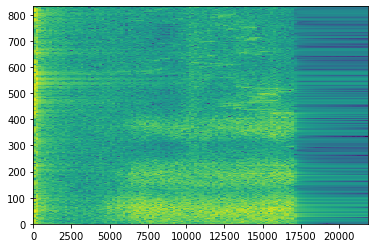

In [89]:
plt.pcolormesh(frq,range(834),plot_data)

In [70]:
np.argmax(data_y[27])

1

C:\Users\gosan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


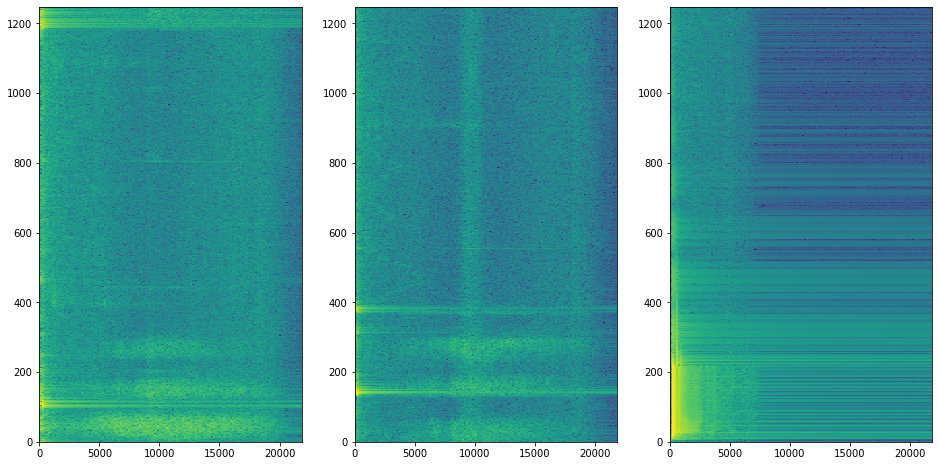

In [71]:
plt.figure(figsize=(16, 8))

wide=1
height=3
start=26

for i in range(1,wide*height+1):
    plt.subplot(wide,height,i)
    ak=plt.pcolormesh(frq,range(1248),data_x[start].reshape(1248,128))
    #label=str(chr(np.argmax(data_y[i-1])+97))
    #plt.legend([ak],[label])
    start+=1

plt.show()

C:\Users\gosan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


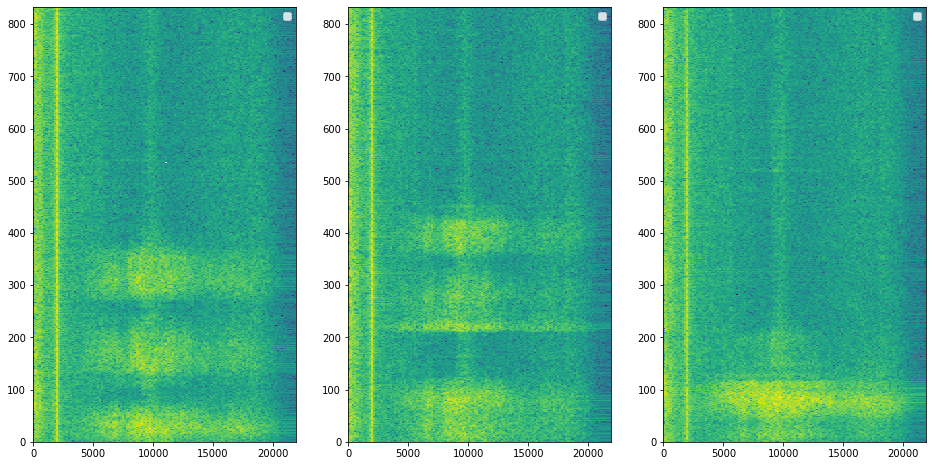

In [116]:
plt.figure(figsize=(16, 8))

wide=1
height=3
start=0

for i in range(1,wide*height+1):
    plt.subplot(wide,height,i)
    plt.pcolormesh(frq,range(834),new_test_x[start].reshape(834,128),label=str(chr(np.argmax(new_test_y[start])+97)))
    
    plt.legend()
    start+=1

plt.show()

In [108]:
new_test_x.shape

(3, 834, 128, 1)

In [110]:
new_test_y

array([0, 1, 2])

C:\Users\gosan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


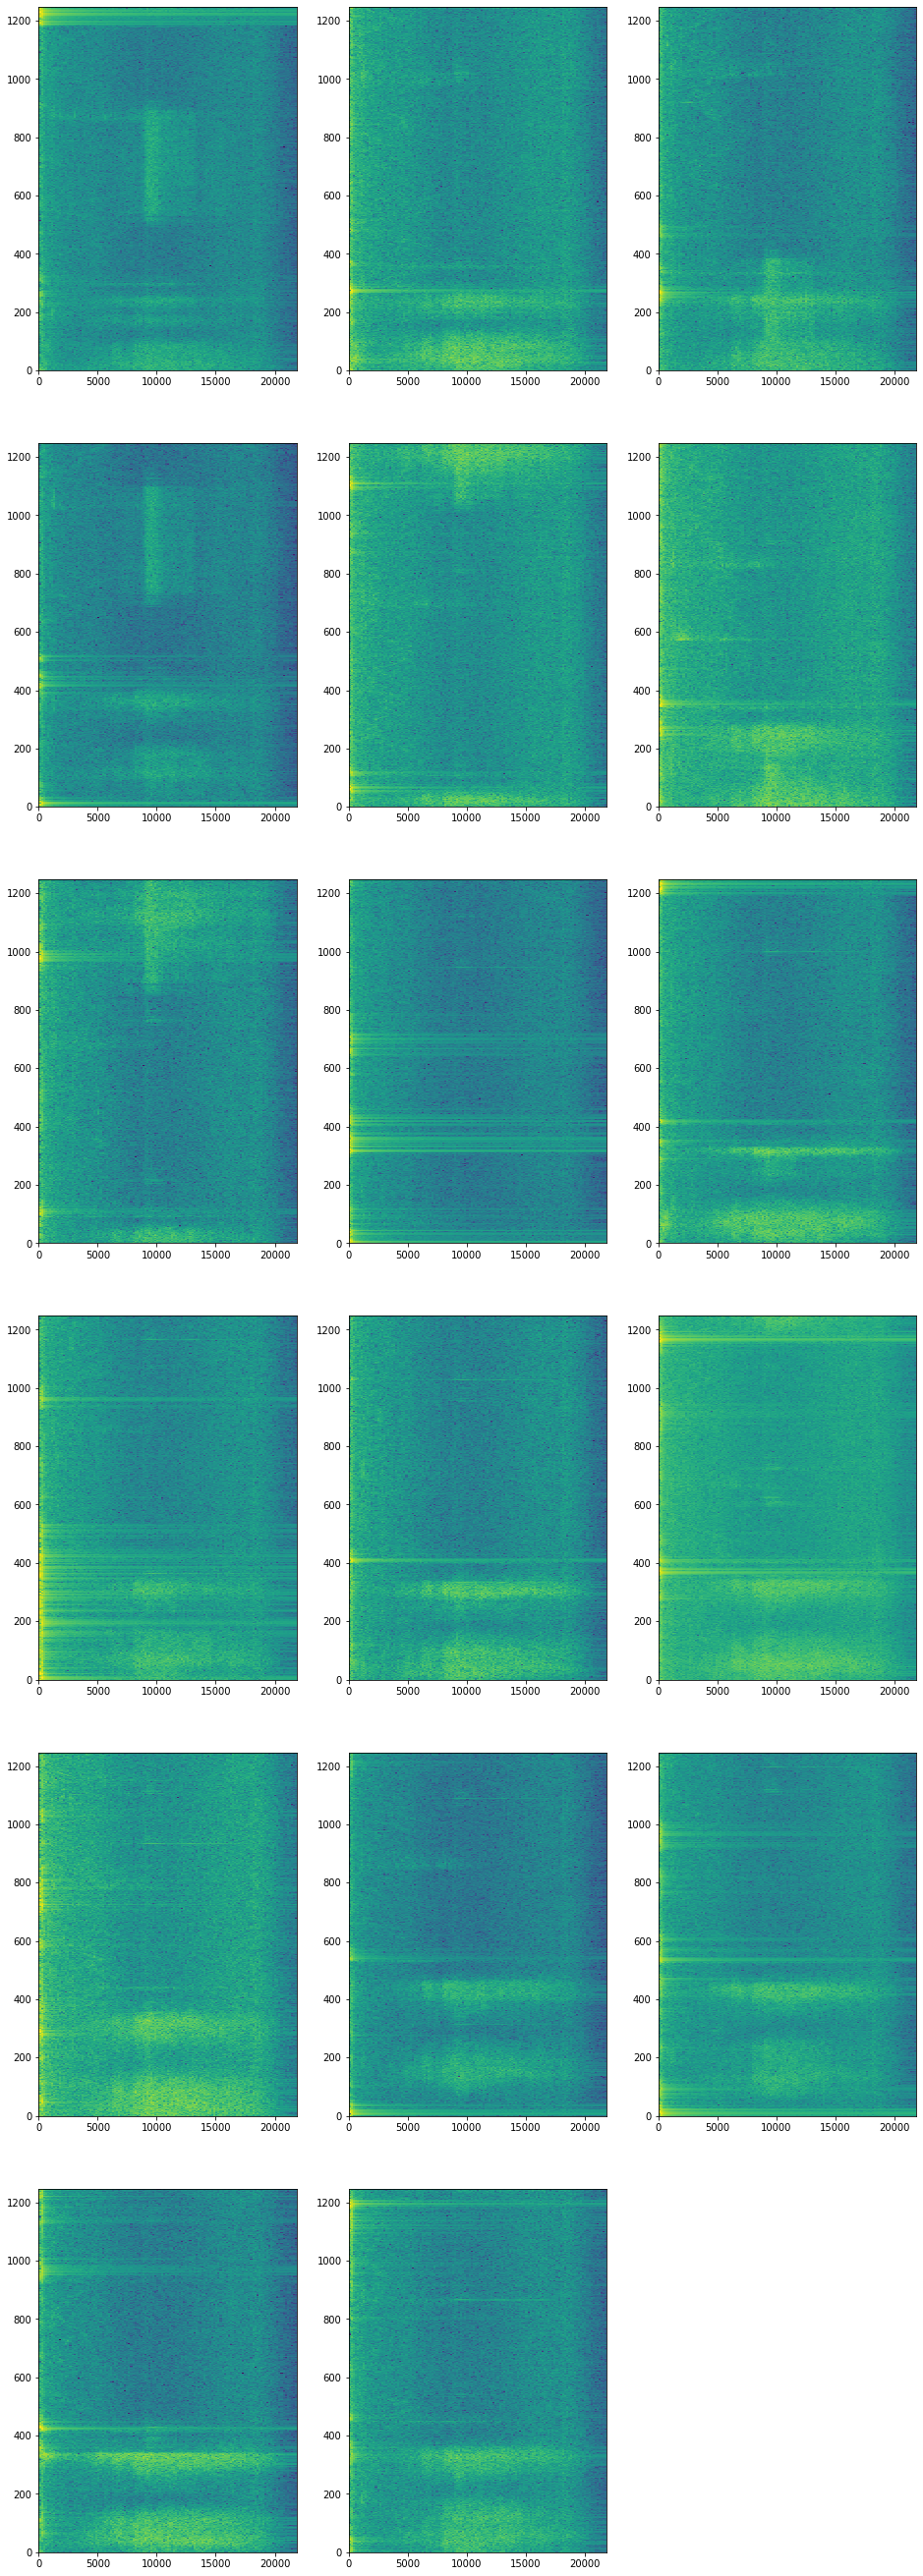

In [91]:
plt.figure(figsize=(16, 64))

wide=8
height=3
start=0

for i in range(1,wide*height+1):
    if(start>=new_test_x.shape[0]):
        break
    plt.subplot(wide,height,i)
    ak=plt.pcolormesh(frq,range(1248),new_test_x[start].reshape(1248,128))
    #label=str(chr(np.argmax(data_y[i-1])+97))
    #plt.legend([ak],[label])
    start+=1

plt.show()

# Convert to tflite

In [30]:
h5_path='./model/mat8-lenet5.h5'
model_path='./model/mat8-lenet5.tflite'


model.save(h5_path)

model2 = tf.keras.models.load_model(h5_path)
converter = tf.lite.TFLiteConverter.from_keras_model(model2)

#converter = lite.TFLiteConverter.from_keras_model_file(h5_path)
#tf.lite.TFLiteConverter.from_keras_model_file(h5_path)
flat_data = converter.convert()

with open(model_path, 'wb') as f:
    f.write(flat_data)


